In [1]:
from task_generator import gen_kato_utilizations
from utils import taskset_generator, gen_periods_uniform_help, priority_append_triplet
import numpy as np

In [2]:
# Algorithms used
from semi_partitioned_algos import DMPM, RMDP
from partitioned_algos import P_DM, FBB_FDD

In [3]:
#gen_ripoll(3,2,5,0,1)
#gen_uunifastdiscard(3,1,5)
#utils=gen_randfixedsum(3,4,20)
utils=gen_kato_utilizations(3,0.1,1,4*0.7)
periods=gen_periods_uniform_help(utils,10,100)
#utils,periods=util_sort(utils,periods)

tasksets=priority_append_triplet(utils,periods)#Returns (exec_time, periods,priority)

In [4]:
tasksets=taskset_generator(nsets=3,umin=0.1,umax=0.7,target_util=6,period_min=10,period_max=100,order='util')

In [5]:
# Single taskset generation
tasksets[0]

[(29.159136, 42.827159, 0),
 (24.272249, 35.747578, 1),
 (61.169202, 92.252002, 2),
 (38.784298, 65.70083, 3),
 (18.764503, 34.23832, 4),
 (40.572363, 85.923557, 5),
 (29.014207, 62.6697, 6),
 (24.852383, 67.769531, 7),
 (5.085273, 14.586199, 8),
 (16.933413, 69.617328, 9),
 (10.515979, 43.718479, 10),
 (15.877434, 83.835137, 11),
 (8.08785, 45.839488, 12),
 (7.71823, 58.965395, 13),
 (1.691715, 16.16734, 14),
 (8.010117, 77.719251, 15)]

In [6]:
test=DMPM(tasksets[0],6)
test.assign_tasks()
# Shows working of DM-PM algorithm
proc_tasks=test.get_processor_tasks()
# Shows the tasks assigned to each processor
proc_tasks

task= (29.159136, 42.827159, 0)
task= (24.272249, 35.747578, 1)
task= (61.169202, 92.252002, 2)
task= (38.784298, 65.70083, 3)
task= (18.764503, 34.23832, 4)
task= (40.572363, 85.923557, 5)
task= (29.014207, 62.6697, 6)
Splitting task (29.014207, 62.6697, 6)
Task cannot be scheduled
[0.6808561828721816, 0.6789900283594038, 0.6630663906892773, 0.5903167128938859, 0.548055599690639, 0.4721913805314182]


[[(29.159136, 42.827159, 0)],
 [(24.272249, 35.747578, 1)],
 [(61.169202, 92.252002, 2)],
 [(38.784298, 65.70083, 3)],
 [(18.764503, 34.23832, 4)],
 [(40.572363, 85.923557, 5)]]

In [7]:
test.proc_has_spare_capacity

[False, False, False, False, False, False]

In [8]:
test.get_proc_utils()

[0.6808561828721816,
 0.6789900283594038,
 0.6630663906892773,
 0.5903167128938859,
 0.548055599690639,
 0.4721913805314182]

In [9]:
test.cFracOfTaskSplittedPerProc

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  2.3894154999999984,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]]

In [10]:
test_taskset=[(2,9,0),(3,10,1),(5,20,2),(7,21,3),(9,30,4),(8,31,5),(13,40,6)]
# Integer taskset to test the algorithm

In [13]:
test=DMPM(test_taskset,2)
test.assign_tasks()

False

In [14]:
test.get_proc_utils()

[0.7722222222222221, 0.6333333333333333]

In [15]:
test.cFracOfTaskSplittedPerProc
# Shows the fraction of task that is assigned to each processor

[[0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 7.0]]

In [16]:
test.get_processor_tasks()

[[(2, 9, 0), (3, 10, 1), (5, 20, 2)], [(7, 21, 3), (9, 30, 4)]]

In [17]:
from simulators import DMPM_Sim, RMDP_Sim, P_DM_Sim

In [18]:
#
system_util=np.linspace(0.5,1,11)
system_util
umin=0.25
umax=0.75

In [19]:
system_util

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [20]:
ratio=[]
# In case the followin code doesn't run, try commenting the print statements in the semi_partitioned.py DM-PM file  
for i in system_util:
  ratio.append([DMPM_Sim(10000,x,umin,umax,i) for x in [2,4,8,16]])

Schedulable= 10000
Schedulable= 10000
Schedulable= 10000
Schedulable= 10000
Schedulable= 9979
Schedulable= 9637
Schedulable= 7638
Schedulable= 3512
Schedulable= 566
Schedulable= 11
Schedulable= 0


Text(0.5, 1.0, 'Comparision of DM-PM with number of processors')

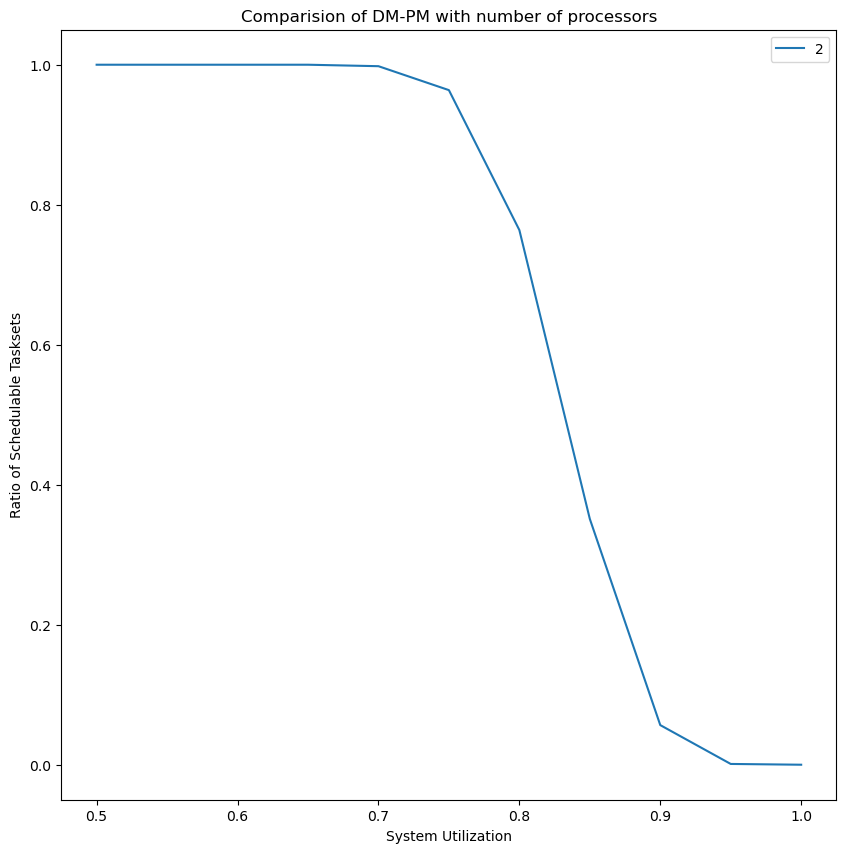

In [21]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=[10,10])
plt.plot(system_util,ratio)
plt.xlabel('System Utilization')
plt.ylabel('Ratio of Schedulable Tasksets')
plt.legend(['2','4','8','16','32'])
plt.title('Comparision of DM-PM with number of processors')

In [22]:
ratio#0.25-0.75

[[1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.9979],
 [0.9637],
 [0.7638],
 [0.3512],
 [0.0566],
 [0.0011],
 [0.0]]

In [23]:
ratio#0.4-0.6

[[1.0],
 [1.0],
 [1.0],
 [1.0],
 [0.9979],
 [0.9637],
 [0.7638],
 [0.3512],
 [0.0566],
 [0.0011],
 [0.0]]

In [24]:
ratio_pdm=[]
for i in system_util:
  ratio_pdm.append([P_DM_Sim(10000,x,umin,umax,i) for x in [4]])

Text(0.5, 1.0, 'Comparision of P-DM with number of processors')

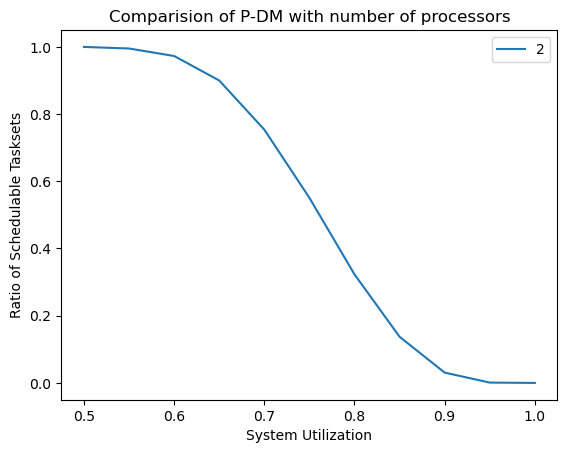

In [25]:
import matplotlib.pyplot as plt
plt.plot(system_util,ratio_pdm)
plt.xlabel('System Utilization')
plt.ylabel('Ratio of Schedulable Tasksets')
plt.legend(['2','4','8','16','32','64'])
plt.title('Comparision of P-DM with number of processors')
#plt.plot(system_util,ratio_pdm)

In [26]:
tasksets=taskset_generator(nsets=3,umin=0.1,umax=0.7,target_util=6,period_min=10,period_max=100,order='dm')

In [27]:
tasksets[0]

[(8.860577, 16.387267, 0),
 (6.110144, 18.924989, 1),
 (13.829526, 22.797359, 2),
 (17.625934, 34.768053, 3),
 (10.618873, 34.853098, 4),
 (25.492802, 36.704662, 5),
 (5.963514, 51.72061, 6),
 (17.637649, 70.43982, 7),
 (42.323674, 78.910386, 8),
 (27.029592, 80.458892, 9),
 (61.407944, 87.793961, 10),
 (48.712521, 88.298457, 11),
 (3.148291, 95.989393, 12),
 (50.133837, 99.924629, 13)]

In [28]:
#Create RMDP object
test=RMDP(tasksets[0],6)
#Assign tasks to processors
test.assign_tasks()
#Get the tasks assigned to each processor
proc_tasks=test.get_processor_tasks()
#Get the utilization of each processor
test.get_proc_utils()

[0.6560013536962055,
 0.627536319188196,
 0.606628425687379,
 0.7573509105807359,
 0.694538530282611,
 0.5363511211312538]

In [29]:
ratio_rmdp=[]
for i in system_util:
  ratio_rmdp.append([RMDP_Sim(1000,x,umin,umax,i) for x in [4]])

In [ ]:
ratio=[]
for i in system_util:
  ratio.append([DMPM_Sim(10000,x,umin,umax,i) for x in [4]])

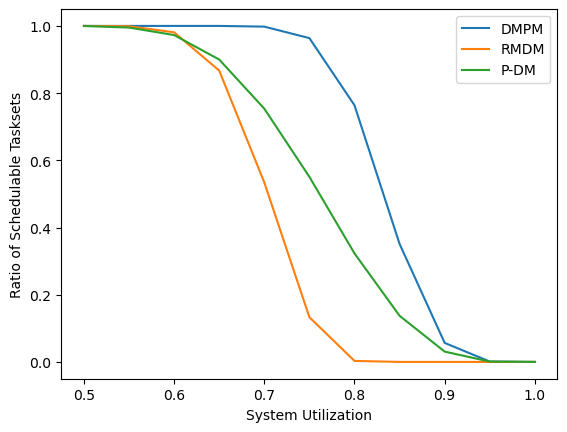

In [30]:
import matplotlib.pyplot as plt
plt.plot(system_util,ratio)
plt.plot(system_util,ratio_rmdp)
plt.xlabel('System Utilization')
plt.ylabel('Ratio of Schedulable Tasksets')
#plt.legend(['4','8','16','32','64'])
plt.plot(system_util,ratio_pdm)
#make plot large
plt.rcParams["figure.figsize"] = (10,10)
plt.legend(['DMPM','RMDM','P-DM'])